## Neural Nets ## 
This notebook is based off of [L15](https://www.youtube.com/watch?v=Z1pcTxvCOgw&list=PLruBu5BI5n4aFpG32iMbdWoRVAA-Vcso6&index=15) and L16 of David McKay's course on Info Theory, Inference, and Learning Algorithms. 





Recall that a _neuron_ within a neural net linearly combines inputs (with possibly a bias)
and then send that output through some non-linear activation function (sigmoid, ReLu etc). 
$$
a = \sum_{i=1}^{K} w_i x_i + w_o
$$
$$
y=f(a)
$$

These equations should look familiar. They have been previously shown as 
1.) The Variational Free Energy (VAE) of a spin system where you took a weighted sum of the surrounding spins and put them through a $tanh()$ function 
2.) Classifying a point that comes from the mixture of two gaussians-$P(c=1 | x) = f(a)$ where $f(a) = \frac{1}{1 + e^{-a}}$ and $a = \sum_{i=1}^{K} w_i x_i + w_o$

### Training the Network ### 
Now the difference between the neural network and the previous ways we have seen this set up is that we will iteratively 'learn' our way to a solution by updating our weights. The way we do that here is by calculating our loss at each iteration, and then following the gradient (with respect to weights) in a way that reduces our loss. 
Namely, we will use the _binary cross entropy_ loss function which is used typically in binary classification tasks 
$$
L(W) = -\sum_{i=1}^{N} t_i\log{y_i} + (1 - t_i)\log{1-y_i} 
$$ 
Where $t_i$ is our target (1 or 0) and $y_i$ is the output of our network. 

Let's visualize this function

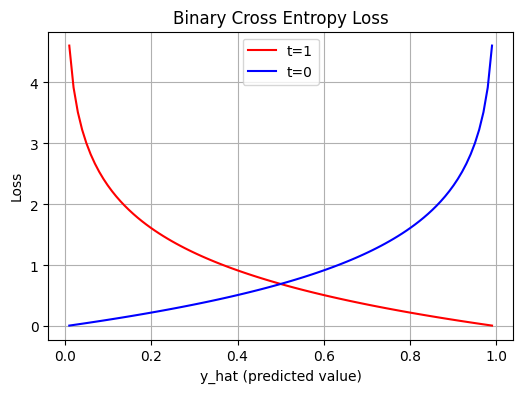

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Define the binary cross entropy loss function
def binary_cross_entropy(y_hat, t=1):
    return -t * np.log(y_hat) - (1 - t) * np.log(1 - y_hat)

# Generate a range of y_hat values
y_hat = np.linspace(0.01, 0.99, 100)

# Calculate the loss for each y_hat value
loss_1 = binary_cross_entropy(y_hat)
loss_0 = binary_cross_entropy(y_hat, 0)
# Plot the loss function
plt.figure(figsize=(6, 4))
plt.plot(y_hat, loss_1, color='r', label='t=1')
plt.plot(y_hat, loss_0, color='b', label='t=0')
plt.title('Binary Cross Entropy Loss')
plt.xlabel('y_hat (predicted value)')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

So this is what it looks like - the red line would be if our target variable is 1 and the blue one if our target variable ($t_i$) is 0. 

One more thing to go over, how we update the weights. We will be following a simple gradient descent formula, where we move in the negative direction of the gradient at each step. The gradient here is 
$\frac{\partial L}{\partial W}$ and for our binary cross entropy loss function (with logistic activation) it's not too hard to show that this evaluates to 
$$
\frac{\partial L}{\partial W} = \sum_{i=1}^{N} (t_i - y_i) * x
$$

You can look [here](https://www.python-unleashed.com/post/derivation-of-the-binary-cross-entropy-loss-gradient) for a complete derivation (in the vectorized case)

OK let's train the simplest neural net in the world with two input variables and a single neuron and see how it goes ! 

1.) First we will sample and display the data 
2.) Then you can explore our sigmoid activation function and how it responds
to different weight values 
3.) Then we will create our training samples, loop through one epoch of all samples, accumulate our gradient and update our weights. 

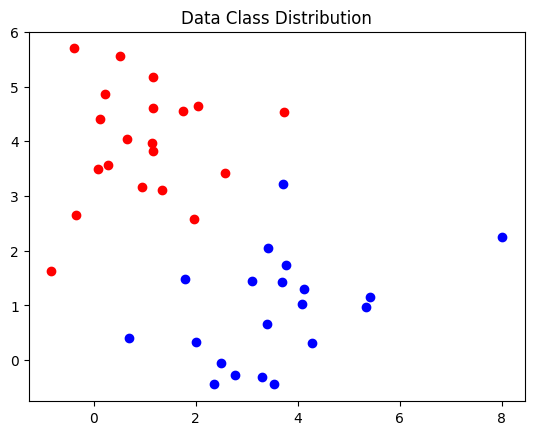

In [34]:
mean1, cov1 = [1, 4], [[1, 0], [0, 1]]
mean2, cov2 = [4, 1], [[2, 0], [0, 2]]

# Draw 20 points from each distribution
x1, y1 = np.random.multivariate_normal(mean1, cov1, 20).T
x2, y2 = np.random.multivariate_normal(mean2, cov2, 20).T

# Plot the points
plt.scatter(x1, y1, color='red')
plt.scatter(x2, y2, color='blue')
plt.title('Data Class Distribution')
plt.show()

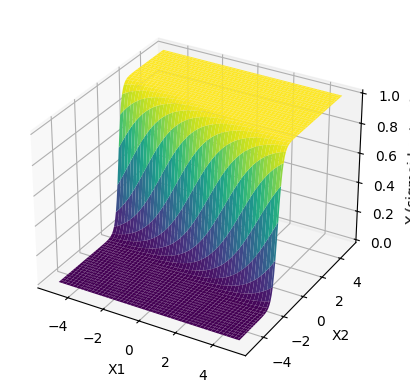

In [28]:
def sigmoid(x, w):
    x = np.dot(x, w)
    return 1 / (1 + np.exp(-x))

def plot_output_layer(w):
    x1 = np.linspace(-5, 5, 100)
    x2 = np.linspace(-5, 5, 100)

    X1, X2 = np.meshgrid(x1, x2)
    X3 = np.ones(X1.shape)  # bias term

    X = np.stack([X1, X2, X3], axis=-1)
    Z = sigmoid(X, w)

    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(X1, X2, Z, cmap='viridis')

    ax.set_xlabel('X1')
    ax.set_ylabel('X2')
    ax.set_zlabel('Y (sigmoid output)')

    plt.show()

# vary weights to see how our activation function changes 
plot_output_layer(np.array([1, 5, 2]))

[-4.63077325  0.67422188  2.00041578]


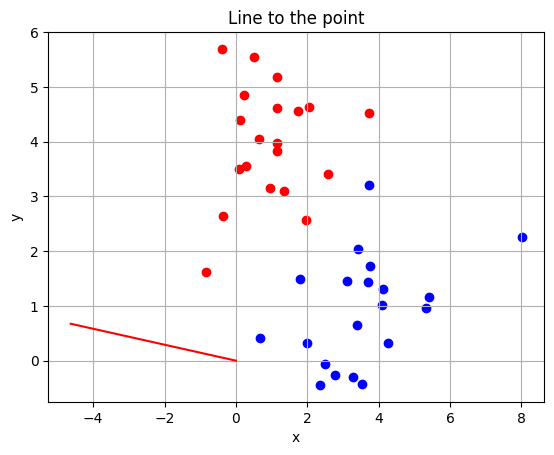

In [36]:
import random 

learning_rate = 0.1

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def loss(y ,t):
    return -t * np.log(y) - (1 - t) * np.log(1 - y)

def calc_gradient(y, t, x):
    dL_dw = (y - t) * x
    return dL_dw

# add extra dimension for the bias term
train_data_1 = zip(x1, y1, np.ones(20), np.ones(20))
train_data_0 = zip(x2, y2, np.ones(20), np.zeros(20))

# Combine the two classes into a single dataset
train_data = list(train_data_1) + list(train_data_0)
random.shuffle(train_data)

# Initialize the weights to something random
w = np.array([2.5, 2.5, 4])
dL_dw = np.zeros(3)
for sample in train_data:
    x = np.array(sample[:3])
    t = sample[3]
    y = sigmoid(np.dot(w, x))
    dL_dw += calc_gradient(y, t, x)

w -= learning_rate * dL_dw
print(w)

w1, w2 = w[:2]
w1 = np.linspace(0, w1, 100)
w2 = np.linspace(0, w2, 100)

plt.scatter(x1, y1, color='red')
plt.scatter(x2, y2, color='blue')

# Plot the line
plt.plot(w1, w2, '-r')

plt.title('Line to the point')
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.show()
